READ DATASET PhishingDataset.csv

C:\Users\ricar\AppData\Local\Temp\ipykernel_10348\946992285.py:9: DtypeWarning: Columns (55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url, delimiter=';', header=0, encoding='utf-8')


{'Média': 33.58671338209469, 'Mediana': 27.0, 'Modo': 26.0, 'std_dev': 36.01044976128436, 'Percentagens': 0.25    23.0
0.50    27.0
0.75    34.0
Name: URLLength, dtype: float64}


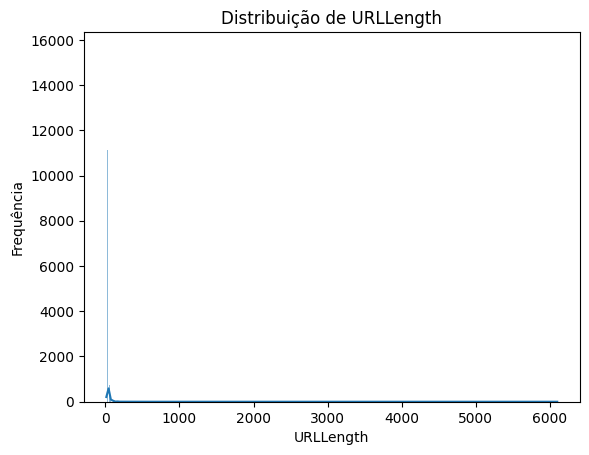

In [1]:
#estatistica
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_url = 'PhishingDataset.csv'

# Read the dataset using pandas
df = pd.read_csv(data_url, delimiter=';', header=0, encoding='utf-8')


def etatisticas_descritivas(data, column):
    media = data[column].mean()
    mediana = data[column].median()
    modo = data[column].mode()[0] if not data[column].mode().empty else 'N/A'
    std_dev = data[column].std()
    percentagens = data[column].quantile([0.25, 0.5, 0.75])

    return {
        "Média": media,
        "Mediana": mediana,
        "Modo": modo,
        "std_dev": std_dev,
        "Percentagens": percentagens
    }

stats = etatisticas_descritivas(df, 'URLLength')
print(stats)

def distribuicao_variavel(data, column):
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribuição de {column}")
    plt.xlabel(column)
    plt.ylabel("Frequência")
    plt.show()

distribuicao_variavel(df, 'URLLength')